In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [18]:
#입력이미지, 필터의 높이, 필터의 너비, 출력 이미지의 높이와 너비
def im2col(image, flt_h, flt_w, out_h, out_w):
    img_h, img_w = image.shape #입력 이미지의 높이와 너비
    
    #생성되는 행렬 크기
    cols = np.zeros((flt_h * flt_w, out_h*out_w))
    
    for h in range(out_h):
        h_lim = h + flt_h #현재 위치 h행에서 필터 높이를 더한 h_lim
        for w in range(out_w):
            w_lim = w + flt_w #현재 넓이 w에서 필터 너비를 더한 w_lim
            
            #cols[:, w] -> w열 전체에 대한 접근
            #슬라이싱 한 영역을 한 열씩 옆으로 옮겨가며 저장
            cols[:, h * out_w + w] = \
                image[h:h_lim, w:w_lim].reshape(-1) #현재 위치 h행 w열에서 필터 크기만큼 슬라이싱
            
    return cols

img = np.array([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12],
               [13, 14, 15, 16]])
cols = im2col(img, 2, 2, 3, 3)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [20]:
#배열에 접근하는 횟수를 줄여보자-----------------------

#입력이미지, 필터의 높이, 필터의 너비, 출력 이미지의 높이와 너비
def im2col(image, flt_h, flt_w, out_h, out_w):
    img_h, img_w = image.shape #입력 이미지의 높이와 너비
    
    #생성되는 행렬 크기
    cols = np.zeros((flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + out_h
        for w in range(flt_w):
            w_lim = w + out_w
            
            cols[h, w, :, :] = image[h:h_lim, w:w_lim]
            
    cols = cols.reshape(flt_h*flt_w, out_h*out_w)
            
    return cols

img = np.array([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12],
               [13, 14, 15, 16]])
cols = im2col(img, 2, 2, 3, 3)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [ ]:
#배치, 채널 적용-----------------------------------

#입력이미지, 필터의 높이, 필터의 너비, 출력 이미지의 높이와 너비
def im2col(image, flt_h, flt_w, out_h, out_w):
    #배치 사이즈, 채널 수, 입력 이미지 높이, 너비
    n_bt, n_ch, img_h, img_w = image.shape
    
    #생성되는 행렬 크기
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + out_h
        for w in range(flt_w):
            w_lim = w + out_w
            
            cols[:, :, h, w, :, :] = image[:, :, h:h_lim, w:w_lim]
            
    #채널 수 * 필터 높이 * 필터 너비 , 배치 사이즈 * 출력 이미지 높이 * 너비
    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(
        n_ch * flt_h * flt_w, n_bt * out_h * out_w
    )
            
    return cols

img = np.array([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12],
               [13, 14, 15, 16]])
cols = im2col(img, 2, 2, 3, 3)
print(cols)

In [2]:
#배치, 채널, 패딩, 스트라이드 적용-----------------------------------

#입력이미지, 필터의 높이, 필터의 너비, 출력 이미지의 높이와 너비
def im2col(images, flt_h, flt_w, out_h, out_w, stride, pad):
    #배치 사이즈, 채널 수, 입력 이미지 높이, 너비
    n_bt, n_ch, img_h, img_w = images.shape
    
    img_pad = np.pad(images, [(0,0), (0,0), (pad, pad), (pad, pad)], "constant")
    #생성되는 행렬 크기
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            
            #h에서 부터 h_lim전 까지 stride만큼 건너뛰면서 슬라이싱
            cols[:, :, h, w, :, :] = images[:, :, h:h_lim:stride, w:w_lim:stride]
            
    #채널 수 * 필터 높이 * 필터 너비 , 배치 사이즈 * 출력 이미지 높이 * 너비
    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(
        n_ch * flt_h * flt_w, n_bt * out_h * out_w
    )
            
    return cols

img = np.array([[[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12],
               [13, 14, 15, 16]]]])
cols = im2col(img, 2, 2, 3, 3, 1, 0)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [3]:
def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):
    n_bt, n_ch, img_h, img_w = img_shape
    
    cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(
        3, 0, 1, 2, 4, 5
    )
    images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]
            
    return images[:, :, pad:img_h+pad, pad:img_w+pad]

cols = np.ones((4, 4))
img_shape = (1, 1, 3, 3)
images = col2im(cols, img_shape, 2, 2, 2, 2, 1, 0)
print(images)

[[[[1. 2. 1.]
   [2. 4. 2.]
   [1. 2. 1.]]]]


In [ ]:
class ConvLayer:
    #입력 채널 수, 입력 이미지 높이, 너비
    #필터 수, 필터 높이, 필터 너비, 스트라이드 너비, 패딩 너비
    def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
        self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)
        
        #필터와 편향 초기값
        self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
        self.b = wb_width * np.random.randn(1, n_flt)
        
        #출력 이미지 크기
        self.y_ch = n_flt #출력 채널수
        self.y_h = (x_h - flt_h + 2 * pad) // stride + 1 #출력 높이
        self.y_w = (x_w - flt_w + 2 * pad) // stride + 1 #출력 너비
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #입력 이미지와 필터를 행렬로 변환
        self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
        self.w_col = self.w.reshape(n_flt, x_ch * flt_h * flt_w)
        
        #출력 계산:행렬 곱(컨볼루션), 편향 더하기, 활성화 함수
        u = np.dot(self.w_col, self.cols).T + self.b
        self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
        self.y = np.where(self.u <= 0, 0, self.u) #활성화 함수 - ReLU
        
    #뒷 층의 출력 기울기(입력에 대한 기울기)
    def backward(self, grad_y)
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #delta
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU의 미분
        delta = delta.transpose(0, 2, 3, 1).reshape(n_bt * y_h * y_w, y_ch)
        
        #필터와 편향 기울기
        grad_w = np.dot(self.cols, delta)
        self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
        self.grad_b = np.sum(delta, axis =0)
        
        #입력 기울기
        grad_cols = np.dot(delta, self.w_col)
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)
        
class PoolingLayer:
    def __init__(self, x_ch, x_h, x_w, pool, pad):
        self.params = (x_ch, x_h, x_w, pool, pad)
        
        self.y_ch = x_ch #출력 채널 수
        self.y_h = x_h // pool if x_h % pool == 0 else x_h // pool + 1 #출력 높이
        self.y_w = x_w // pool if x_w % pool == 0 else x_w // pool + 1 #출력 너비
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, pool, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #입력 이미지를 행렬로 변환
        cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
        cols = cols.T.reshape(n_bt * y_h * y_w * x_ch, pool * pool)
        
        #출력 계산 : 맥스풀링
        y = np.max(cols, axis=1) #위에서 cols.T로 전치 시켜서 axis를 0이 아닌 1을 사용하는 듯.
        self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)
        
        #최대값 인덱스 저장
        self.max_index = np.argmax(cols, axis=1)
        
    def backward(self, grad_y):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, pool, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #출력 기울기의 축을 변경
        grad_y = grad_y.transpose(0, 2, 3, 1)
        
        #행렬생성
        grad_cols = np.zeros((pool * pool, grad_y, size))
        
        #각 열의 최댓값이 있던 위치에 출력 기울기 입력
        grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
        grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
        grad_cols = grad_cols.transpose(5, 0, 1, 2, 3, 4)
        grad_cols = grad_cols.reshape(y_ch * pool * pool, n_bt * y_h * y_w)
        
        #입력 기울기
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)
        

        

In [36]:
#인덱싱 테스트(행렬에서 최대값이 있는 곳을 찾아 -1로 바꾸기)

a = np.array([[ 0,  7, 11,  2],
              [12, 15,  8, 10],
              [14,  5,  1,  6],
              [ 9, 13,  4,  3]])
print(a)

#세로 방향으로 최대 값의 인덱스 찾기
max_index = np.argmax(a, axis = 0)
print("각 열에서 최대 값이 위치한 행 번호")
print(max_index)

#max_index에 포함된 행 번호를 포함하는 행렬
#[2, 1, 0, 1] -> 2행, 1행, 0행 ,1행을 포함하는 행렬
#각 열의 최대값이 속한 행이 순서대로 위에서 아래로 조회됨
#0번째 열의 최대 값이 속한 행이 맨 위로
#1, 2, 3번째 열의 최대 값이 속한 행이 차례대로
print("0, 1, 2, 3번째 열의 최대 값이 속한 행이 차례대로 0, 1, 2, 3번 행으로 구성")
print(a[max_index])

#각 행에 대해서 0, 1, 2, 3열 조회
#0행에 대해 0번째 열
#1행에 대해 1번째 열
#2행에 대해 2번째 열
#3행에 대해 3번째 열
# -> 각 열의 최대 값
print("각 행에 대해서 최대 값이 속한 열을 추출")
print(a[max_index, [0, 1, 2, 3]])

#각 열의 최대 값이 있던 곳에 -1을 입력
a[max_index, [0, 1, 2, 3]] = [-1, -1, -1, -1]

print(a)

[[ 0  7 11  2]
 [12 15  8 10]
 [14  5  1  6]
 [ 9 13  4  3]]
각 열에서 최대 값이 위치한 행 번호
[2 1 0 1]
0, 1, 2, 3번째 열의 최대 값이 속한 행이 차례대로 0, 1, 2, 3번 행으로 구성
[[14  5  1  6]
 [12 15  8 10]
 [ 0  7 11  2]
 [12 15  8 10]]
각 행에 대해서 최대 값이 속한 열을 추출
[14 15 11 10]
[[ 0  7 -1  2]
 [12 -1  8 -1]
 [-1  5  1  6]
 [ 9 13  4  3]]


(1797, 64)


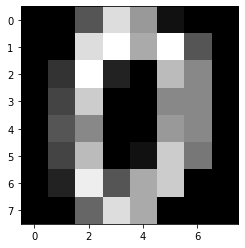

In [37]:
#손글씨 숫자 데이터 확인

from sklearn import datasets

digits = datasets.load_digits()
print(digits.data.shape)

plt.imshow(digits.data[0].reshape(8, 8), cmap="gray")
plt.show()

In [38]:
#각 이미지에 대한 정답 

print(digits.target.shape)
print(digits.target[:50])

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


Epoch: 0/50 Error_train:2.372209906914706, Error_test:2.359815683824711
Epoch: 10/50 Error_train:0.052157562453313766, Error_test:0.11731505784023322
Epoch: 20/50 Error_train:0.026841099009598555, Error_test:0.06972120729237945
Epoch: 30/50 Error_train:0.015306361257584585, Error_test:0.055103271710480885
Epoch: 40/50 Error_train:0.010828870620991223, Error_test:0.02180093983665522


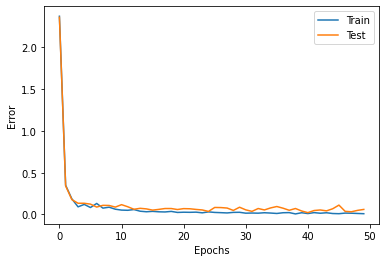

Accuracy Train:100.0% Accuracy Test:98.6644407345576%


In [44]:
#손글씨 CNN 구현

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#손글씨 데이터 불러오기-----------
digits_data = datasets.load_digits()
input_data = digits_data.data
correct = digits_data.target
n_data = len(correct)

#입력 데이터 표준화----------------
ave_input = np.average(input_data)
std_input = np.std(input_data)
input_data = (input_data - ave_input) / std_input

#정답을 원핫 인코딩으로 표현--------------
#정답이 0~9의 10개중 하나 이므로 열은 10개
# 1 0 0 0 0 0 0 0 0 0
# ....
# 0 0 0 0 0 0 0 0 0 1
correct_data = np.zeros((n_data, 10))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0
    
#훈련 데이터와 테스트 데이터----------
index = np.arange(n_data)
index_train = index[index % 3 != 0]
#30%를 테스트 데이터로
index_test = index[index % 3 == 0]

#input_data는 8*8짜리 이미지가 1797개 포함되어 있다
#1797개의 행에 각각 64열씩 이미지 데이터가 포함되어 있는 것
#거기서 index만큼 행을 추출하여 훈련 및 테스트 데이터 추출
input_train = input_data[index_train, :] #훈련 데이터 추출
correct_train = correct_data[index_train, :] #훈련 데이터 정답
input_test = input_data[index_test, :] #테스트 데이터 입력
correct_test = correct_data[index_test, :] #테스트 데이터 정답

n_train = input_train.shape[0] #훈련 데이터 샘플 수
n_test = input_test.shape[0] #테스트 데이터 샘플 수

#각 설정 값-----------------
img_h = 8 #입력 이미지의 높이
img_w = 8 #입력 이미지 너비
img_ch = 1 #입력 이미지 채널 수

wb_width = 0.1 #가중 치와 편향 설정을 위한 정규분포 표준편차
eta = 0.01 #학습률
epoch = 50
batch_size = 8
interval = 10
n_sample = 200 #오차 계산 샘플 수

#이미지 데이터를 행렬로 변환-------------------------------
#입력이미지, 필터의 높이, 필터의 너비, 출력 이미지의 높이와 너비
def im2col(images, flt_h, flt_w, out_h, out_w, stride, pad):
    #배치 사이즈, 채널 수, 입력 이미지 높이, 너비
    n_bt, n_ch, img_h, img_w = images.shape
    
    img_pad = np.pad(images, [(0,0), (0,0), (pad, pad), (pad, pad)], "constant")
    #생성되는 행렬 크기
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            
            #h에서 부터 h_lim전 까지 stride만큼 건너뛰면서 슬라이싱
            cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]
            
    #채널 수 * 필터 높이 * 필터 너비 , 배치 사이즈 * 출력 이미지 높이 * 너비
    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(
        n_ch * flt_h * flt_w, n_bt * out_h * out_w
    )
            
    return cols

#행렬 데이터를 이미지로 변환-----------------------------------
def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):
    n_bt, n_ch, img_h, img_w = img_shape
    
    cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(
        3, 0, 1, 2, 4, 5
    )
    images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]
            
    return images[:, :, pad:img_h+pad, pad:img_w+pad]


#컨볼루션 층-----------------------------------------------------
class ConvLayer:
    #n_bt:배치사이즈, x_ch:입력채널 수
    #x_h : 입력 이미지 높이, x_w : 입력 이미지 너비
    #n_flt : 필더 수, flt_h : 필터 높이, flt_w : 필터 너비
    #stride : 스트라이드 너비, pad : 패딩 너비
    #y_ch: 출력 채널 수, y_h : 출력 높이, y_w : 출력 너비
    def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
        self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)
        
        #필터와 편향 초기값
        self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
        self.b = wb_width * np.random.randn(1, n_flt)
        
        #출력 이미지 크기
        self.y_ch = n_flt #출력 채널수
        self.y_h = (x_h - flt_h + 2 * pad) // stride + 1 #출력 높이
        self.y_w = (x_w - flt_w + 2 * pad) // stride + 1 #출력 너비
        
        #과적합 방지 - 아다그라드
        self.h_w = np.zeros((n_flt, x_ch, flt_h, flt_w)) + 1e-8
        self.h_b = np.zeros((1, n_flt)) + 1e-8
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #입력 이미지와 필터를 행렬로 변환
        self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
        self.w_col = self.w.reshape(n_flt, x_ch * flt_h * flt_w)
        
        #출력 계산:행렬 곱(컨볼루션), 편향 더하기, 활성화 함수
        u = np.dot(self.w_col, self.cols).T + self.b
        self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
        self.y = np.where(self.u <= 0, 0, self.u) #활성화 함수 - ReLU
        
    #뒷 층의 출력 기울기(입력에 대한 기울기)
    def backward(self, grad_y):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #delta
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU의 미분
        delta = delta.transpose(0, 2, 3, 1).reshape(n_bt * y_h * y_w, y_ch)
        
        #필터와 편향 기울기
        grad_w = np.dot(self.cols, delta)
        self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
        self.grad_b = np.sum(delta, axis =0)
        
        #입력 기울기
        grad_cols = np.dot(delta, self.w_col)
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)
        
    def update(self, eta):
        self.h_w += self.grad_w * self.grad_w
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b
        
#풀링층-----------------------------------------------------------------------------
class PoolingLayer:
    #n_bt:배치사이즈, x_ch:입력채널 수
    #x_h : 입력 이미지 높이, x_w : 입력 이미지 너비
    #pool : 풀링 영역 크기, pad : 패딩 너비
    #y_ch: 출력 채널 수, y_h : 출력 높이, y_w : 출력 너비
    def __init__(self, x_ch, x_h, x_w, pool, pad):
        self.params = (x_ch, x_h, x_w, pool, pad)
        
        self.y_ch = x_ch #출력 채널 수
        self.y_h = x_h // pool if x_h % pool == 0 else x_h // pool + 1 #출력 높이
        self.y_w = x_w // pool if x_w % pool == 0 else x_w // pool + 1 #출력 너비
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, pool, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #입력 이미지를 행렬로 변환
        cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
        cols = cols.T.reshape(n_bt * y_h * y_w * x_ch, pool * pool)
        
        #출력 계산 : 맥스풀링
        y = np.max(cols, axis=1) #위에서 cols.T로 전치 시켜서 axis를 0이 아닌 1을 사용하는 듯.
        self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)
        
        #최대값 인덱스 저장
        self.max_index = np.argmax(cols, axis=1)
        
    def backward(self, grad_y):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, pool, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #출력 기울기의 축을 변경
        grad_y = grad_y.transpose(0, 2, 3, 1)
        
        #행렬생성
        grad_cols = np.zeros((pool * pool, grad_y.size))
        
        #각 열의 최댓값이 있던 위치에 출력 기울기 입력
        grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
        grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
        grad_cols = grad_cols.transpose(5, 0, 1, 2, 3, 4)
        grad_cols = grad_cols.reshape(y_ch * pool * pool, n_bt * y_h * y_w)
        
        #입력 기울기
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)
        
#전결합층------------------------------------------------------------------------------
class BaseLayer:
    #앞 레이어 뉴런 개수, 현재 레이어 뉴런 개수
    def __init__(self, n_upper, n):
        #randn -> 평균 0, 표준편차 1인 가우시안 표준정규분포 난수를 행렬로 생성
        #wb_width 정규분포의 표준편차
        #가중치(행렬)
        self.w = wb_width * np.random.randn(n_upper, n)
        #편향(벡터)
        self.b = wb_width * np.random.randn(n)
        
        #아다그라드 적용--------------------------
        self.h_w = np.zeros((n_upper, n)) + 1e-8 #매우 작은 수를 더해 분모가 0이 되는 오류를 방지
        self.h_b = np.zeros(n) + 1e-8
        
    #eta - 학습률
    #확률적 경사 하강법을 통해 가중치와 편향 수정
    def update(self, eta):
        #아다그라드 적용--------------------------
        self.h_w += self.grad_w * self.grad_w
        #가중치 기울기
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        
        self.h_b += self.grad_b * self.grad_b
        #편향 기울기
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b

#은닉층----------------------
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) #활성화 함수 - ReLU
        
    #grad_y - 뒤 층의 입력 기울기 값
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU 미분
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
#출력층-----------------------
class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1).reshape(-1, 1) #활성화 함수 - 소프트맥스

    #t - 예측의 정답
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
#각 층의 초기화-------------------------------------------------------------------------------
#필터 개수 10, 필터 높이 3, 필터 너비 3, 스트라이드 1, 패딩 너비 1
#이미지가 컨볼루션 층에서 축소되는 것을 막기 위해 패딩 설정
cl_1 = ConvLayer(img_ch, img_h, img_w, 10, 3, 3, 1, 1)
#입력 채널 수, 입력 이미지 높이, 입력 이미지 너비, 풀링 영역 크기, 패딩 너비
pl_1 = PoolingLayer(cl_1.y_ch, cl_1.y_h, cl_1.y_w, 2, 0)

#전결합층의 입력값은 4차원 -> 2차원 배열로 변환
n_fc_in = pl_1.y_ch * pl_1.y_h * pl_1.y_w
#앞 층 뉴런 개수, 자신의 뉴런 개수
ml_1 = MiddleLayer(n_fc_in, 100)
#앞 층 뉴런 개수, 자신의 뉴런 개수
ol_1 = OutputLayer(100, 10)

#순전파---------------------------------------------------------------------------------------
def forward_propagation(x):
    n_bt = x.shape[0]
    
    images = x.reshape(n_bt, img_ch, img_h, img_w)
    cl_1.forward(images)
    pl_1.forward(cl_1.y)
    
    #4차원 -> 2차원으로 변환
    fc_input = pl_1.y.reshape(n_bt, -1)
    ml_1.forward(fc_input)
    ol_1.forward(ml_1.y)
    
#역전파---------------------------------------------------------------------------------------
#t : 정답
def back_propagation(t):
    n_bt = t.shape[0]
    
    ol_1.backward(t)
    ml_1.backward(ol_1.grad_x)
    
    #2차원 -> 4차원
    grad_img = ml_1.grad_x.reshape(n_bt, pl_1.y_ch, pl_1.y_h, pl_1.y_w)
    pl_1.backward(grad_img)
    cl_1.backward(pl_1.grad_x)
    
#가중치와 편향 수정--------------------------------------------------------------------------
def update_wb():
    cl_1.update(eta)
    ml_1.update(eta)
    ol_1.update(eta)
    
#교차 엔트로피 오차 계산--------------------------------------------------------------------
#미니 배치 학습이므로 오차의 총합을 배치 사이즈로 나눈다.
def get_error(t, batch_size):
    return -np.sum(t * np.log(ol_1.y + 1e-7)) / batch_size

#샘플을 순전파------------------------------------------------------------------------------
def forward_sample(inp, correct, n_sample):
    index_rand = np.arange(len(correct))
    np.random.shuffle(index_rand)
    #샘플 개수만큼 랜덤 인덱스 추출
    index_rand = index_rand[:n_sample]
    x = inp[index_rand, :]
    t = correct[index_rand, :]
    forward_propagation(x)
    return x, t

#오차 기록용-------------
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

#학습 경과 기록 ------------
n_batch = n_train // batch_size #1에포크당 배치 수
for i in range(epoch):
    #오차 계측-------
    x, t = forward_sample(input_train, correct_train, n_sample)
    error_train = get_error(t, n_sample)
    
    x, t = forward_sample(input_test, correct_test, n_sample)
    error_test = get_error(t, n_sample)
    
    #오차 기록-------
    train_error_x.append(i)
    train_error_y.append(error_train)
    test_error_x.append(i)
    test_error_y.append(error_test)
    
    #경과 표시-------
    if i % interval == 0:
        print(f"Epoch: {i}/{epoch} Error_train:{error_train}, Error_test:{error_test}")
        
    #학습--------    
    index_random = np.arange(n_train) #학습에 사용할 인덱스를 생성
    np.random.shuffle(index_random) #인덱스를 무작위로 섞음
    
    for j in range(n_batch):
        #미니배치 샘플 추출
        mb_index = index_random[j * batch_size : (j+1) * batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        #순전파와 역전파
        forward_propagation(x)
        back_propagation(t)
        
        #가중치와 편향 수정
        update_wb()
        
#기록된 오차를 그래프로 표시---------
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

#정답률 측정----------------
x, t = forward_sample(input_train, correct_train, n_train)
count_train = np.sum(
    np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1)
)

x, t = forward_sample(input_test, correct_test, n_test)
count_test = np.sum(
    np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1)
)

print(f"Accuracy Train:{count_train/n_train*100}% Accuracy Test:{count_test/n_test*100}%")

In [45]:
#샘플 데이터로 확인
samples = input_test[:5]
forward_propagation(samples)
print(ol_1.y)
print(correct_test[:5])

[[9.99993454e-01 2.58579905e-10 2.83122561e-08 1.85401478e-09
  8.52738107e-08 2.93645917e-06 3.16768240e-08 3.76535009e-08
  2.75634973e-06 6.67717495e-07]
 [1.71576324e-10 4.95487209e-07 6.74297336e-08 9.99933000e-01
  7.66113439e-11 1.66298309e-05 1.93187976e-08 4.14418420e-08
  2.82958180e-06 4.69170374e-05]
 [7.19776905e-07 5.37957245e-05 3.99534947e-08 5.98003931e-09
  1.71786692e-05 6.21000068e-09 9.99807702e-01 3.55258878e-11
  1.20552019e-04 2.71081831e-12]
 [1.00297355e-05 1.05748354e-04 1.34988838e-10 9.51836822e-06
  7.00857071e-06 3.05641736e-01 2.16460332e-08 2.09379217e-06
  1.09194395e-04 6.94114649e-01]
 [7.19049515e-08 1.20430093e-02 9.87759132e-01 2.15602804e-05
  3.95013989e-07 9.61268439e-06 7.52956852e-06 6.80857366e-07
  1.58006052e-04 2.25348563e-09]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Epoch: 0/50 Error_train:2.3320149080485075, Error_test:2.316785784614076
Epoch: 10/50 Error_train:1.9788662800357841, Error_test:1.9493994231511087
Epoch: 20/50 Error_train:1.8587946962399855, Error_test:1.9085445487974257
Epoch: 30/50 Error_train:1.7883472219494463, Error_test:1.8061009273882802
Epoch: 40/50 Error_train:1.7879100000183137, Error_test:1.7513587219500837


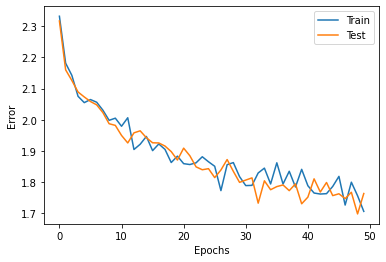

Accuracy Train:45.57595993322204% Accuracy Test:46.24373956594324%


In [46]:
#컨볼루션층의 오차 감소 효과 확인----------------------------------------------------------
#컨볼루션 층을 제외한 나머지 층의 가중치 및 편향 수정 제외

#손글씨 CNN 구현

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#손글씨 데이터 불러오기-----------
digits_data = datasets.load_digits()
input_data = digits_data.data
correct = digits_data.target
n_data = len(correct)

#입력 데이터 표준화----------------
ave_input = np.average(input_data)
std_input = np.std(input_data)
input_data = (input_data - ave_input) / std_input

#정답을 원핫 인코딩으로 표현--------------
#정답이 0~9의 10개중 하나 이므로 열은 10개
# 1 0 0 0 0 0 0 0 0 0
# ....
# 0 0 0 0 0 0 0 0 0 1
correct_data = np.zeros((n_data, 10))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0
    
#훈련 데이터와 테스트 데이터----------
index = np.arange(n_data)
index_train = index[index % 3 != 0]
#30%를 테스트 데이터로
index_test = index[index % 3 == 0]

#input_data는 8*8짜리 이미지가 1797개 포함되어 있다
#1797개의 행에 각각 64열씩 이미지 데이터가 포함되어 있는 것
#거기서 index만큼 행을 추출하여 훈련 및 테스트 데이터 추출
input_train = input_data[index_train, :] #훈련 데이터 추출
correct_train = correct_data[index_train, :] #훈련 데이터 정답
input_test = input_data[index_test, :] #테스트 데이터 입력
correct_test = correct_data[index_test, :] #테스트 데이터 정답

n_train = input_train.shape[0] #훈련 데이터 샘플 수
n_test = input_test.shape[0] #테스트 데이터 샘플 수

#각 설정 값-----------------
img_h = 8 #입력 이미지의 높이
img_w = 8 #입력 이미지 너비
img_ch = 1 #입력 이미지 채널 수

wb_width = 0.1 #가중 치와 편향 설정을 위한 정규분포 표준편차
eta = 0.01 #학습률
epoch = 50
batch_size = 8
interval = 10
n_sample = 200 #오차 계산 샘플 수

#이미지 데이터를 행렬로 변환-------------------------------
#입력이미지, 필터의 높이, 필터의 너비, 출력 이미지의 높이와 너비
def im2col(images, flt_h, flt_w, out_h, out_w, stride, pad):
    #배치 사이즈, 채널 수, 입력 이미지 높이, 너비
    n_bt, n_ch, img_h, img_w = images.shape
    
    img_pad = np.pad(images, [(0,0), (0,0), (pad, pad), (pad, pad)], "constant")
    #생성되는 행렬 크기
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            
            #h에서 부터 h_lim전 까지 stride만큼 건너뛰면서 슬라이싱
            cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]
            
    #채널 수 * 필터 높이 * 필터 너비 , 배치 사이즈 * 출력 이미지 높이 * 너비
    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(
        n_ch * flt_h * flt_w, n_bt * out_h * out_w
    )
            
    return cols

#행렬 데이터를 이미지로 변환-----------------------------------
def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):
    n_bt, n_ch, img_h, img_w = img_shape
    
    cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(
        3, 0, 1, 2, 4, 5
    )
    images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]
            
    return images[:, :, pad:img_h+pad, pad:img_w+pad]


#컨볼루션 층-----------------------------------------------------
class ConvLayer:
    #n_bt:배치사이즈, x_ch:입력채널 수
    #x_h : 입력 이미지 높이, x_w : 입력 이미지 너비
    #n_flt : 필더 수, flt_h : 필터 높이, flt_w : 필터 너비
    #stride : 스트라이드 너비, pad : 패딩 너비
    #y_ch: 출력 채널 수, y_h : 출력 높이, y_w : 출력 너비
    def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
        self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)
        
        #필터와 편향 초기값
        self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
        self.b = wb_width * np.random.randn(1, n_flt)
        
        #출력 이미지 크기
        self.y_ch = n_flt #출력 채널수
        self.y_h = (x_h - flt_h + 2 * pad) // stride + 1 #출력 높이
        self.y_w = (x_w - flt_w + 2 * pad) // stride + 1 #출력 너비
        
        #과적합 방지 - 아다그라드
        self.h_w = np.zeros((n_flt, x_ch, flt_h, flt_w)) + 1e-8
        self.h_b = np.zeros((1, n_flt)) + 1e-8
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #입력 이미지와 필터를 행렬로 변환
        self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
        self.w_col = self.w.reshape(n_flt, x_ch * flt_h * flt_w)
        
        #출력 계산:행렬 곱(컨볼루션), 편향 더하기, 활성화 함수
        u = np.dot(self.w_col, self.cols).T + self.b
        self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
        self.y = np.where(self.u <= 0, 0, self.u) #활성화 함수 - ReLU
        
    #뒷 층의 출력 기울기(입력에 대한 기울기)
    def backward(self, grad_y):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #delta
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU의 미분
        delta = delta.transpose(0, 2, 3, 1).reshape(n_bt * y_h * y_w, y_ch)
        
        #필터와 편향 기울기
        grad_w = np.dot(self.cols, delta)
        self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
        self.grad_b = np.sum(delta, axis =0)
        
        #입력 기울기
        grad_cols = np.dot(delta, self.w_col)
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)
        
    def update(self, eta):
        self.h_w += self.grad_w * self.grad_w
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b
        
#풀링층-----------------------------------------------------------------------------
class PoolingLayer:
    #n_bt:배치사이즈, x_ch:입력채널 수
    #x_h : 입력 이미지 높이, x_w : 입력 이미지 너비
    #pool : 풀링 영역 크기, pad : 패딩 너비
    #y_ch: 출력 채널 수, y_h : 출력 높이, y_w : 출력 너비
    def __init__(self, x_ch, x_h, x_w, pool, pad):
        self.params = (x_ch, x_h, x_w, pool, pad)
        
        self.y_ch = x_ch #출력 채널 수
        self.y_h = x_h // pool if x_h % pool == 0 else x_h // pool + 1 #출력 높이
        self.y_w = x_w // pool if x_w % pool == 0 else x_w // pool + 1 #출력 너비
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, pool, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #입력 이미지를 행렬로 변환
        cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
        cols = cols.T.reshape(n_bt * y_h * y_w * x_ch, pool * pool)
        
        #출력 계산 : 맥스풀링
        y = np.max(cols, axis=1) #위에서 cols.T로 전치 시켜서 axis를 0이 아닌 1을 사용하는 듯.
        self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)
        
        #최대값 인덱스 저장
        self.max_index = np.argmax(cols, axis=1)
        
    def backward(self, grad_y):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, pool, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #출력 기울기의 축을 변경
        grad_y = grad_y.transpose(0, 2, 3, 1)
        
        #행렬생성
        grad_cols = np.zeros((pool * pool, grad_y.size))
        
        #각 열의 최댓값이 있던 위치에 출력 기울기 입력
        grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
        grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
        grad_cols = grad_cols.transpose(5, 0, 1, 2, 3, 4)
        grad_cols = grad_cols.reshape(y_ch * pool * pool, n_bt * y_h * y_w)
        
        #입력 기울기
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)
        
#전결합층------------------------------------------------------------------------------
class BaseLayer:
    #앞 레이어 뉴런 개수, 현재 레이어 뉴런 개수
    def __init__(self, n_upper, n):
        #randn -> 평균 0, 표준편차 1인 가우시안 표준정규분포 난수를 행렬로 생성
        #wb_width 정규분포의 표준편차
        #가중치(행렬)
        self.w = wb_width * np.random.randn(n_upper, n)
        #편향(벡터)
        self.b = wb_width * np.random.randn(n)
        
        #아다그라드 적용--------------------------
        self.h_w = np.zeros((n_upper, n)) + 1e-8 #매우 작은 수를 더해 분모가 0이 되는 오류를 방지
        self.h_b = np.zeros(n) + 1e-8
        
    #eta - 학습률
    #확률적 경사 하강법을 통해 가중치와 편향 수정
    def update(self, eta):
        #아다그라드 적용--------------------------
        self.h_w += self.grad_w * self.grad_w
        #가중치 기울기
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        
        self.h_b += self.grad_b * self.grad_b
        #편향 기울기
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b

#은닉층----------------------
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) #활성화 함수 - ReLU
        
    #grad_y - 뒤 층의 입력 기울기 값
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU 미분
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
#출력층-----------------------
class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1).reshape(-1, 1) #활성화 함수 - 소프트맥스

    #t - 예측의 정답
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
#각 층의 초기화-------------------------------------------------------------------------------
#필터 개수 10, 필터 높이 3, 필터 너비 3, 스트라이드 1, 패딩 너비 1
#이미지가 컨볼루션 층에서 축소되는 것을 막기 위해 패딩 설정
cl_1 = ConvLayer(img_ch, img_h, img_w, 10, 3, 3, 1, 1)
#입력 채널 수, 입력 이미지 높이, 입력 이미지 너비, 풀링 영역 크기, 패딩 너비
pl_1 = PoolingLayer(cl_1.y_ch, cl_1.y_h, cl_1.y_w, 2, 0)

#전결합층의 입력값은 4차원 -> 2차원 배열로 변환
n_fc_in = pl_1.y_ch * pl_1.y_h * pl_1.y_w
#앞 층 뉴런 개수, 자신의 뉴런 개수
ml_1 = MiddleLayer(n_fc_in, 100)
#앞 층 뉴런 개수, 자신의 뉴런 개수
ol_1 = OutputLayer(100, 10)

#순전파---------------------------------------------------------------------------------------
def forward_propagation(x):
    n_bt = x.shape[0]
    
    images = x.reshape(n_bt, img_ch, img_h, img_w)
    cl_1.forward(images)
    pl_1.forward(cl_1.y)
    
    #4차원 -> 2차원으로 변환
    fc_input = pl_1.y.reshape(n_bt, -1)
    ml_1.forward(fc_input)
    ol_1.forward(ml_1.y)
    
#역전파---------------------------------------------------------------------------------------
#t : 정답
def back_propagation(t):
    n_bt = t.shape[0]
    
    ol_1.backward(t)
    ml_1.backward(ol_1.grad_x)
    
    #2차원 -> 4차원
    grad_img = ml_1.grad_x.reshape(n_bt, pl_1.y_ch, pl_1.y_h, pl_1.y_w)
    pl_1.backward(grad_img)
    cl_1.backward(pl_1.grad_x)
    
#가중치와 편향 수정--------------------------------------------------------------------------
def update_wb():
    cl_1.update(eta)
    #ml_1.update(eta)
    #ol_1.update(eta)
    
#교차 엔트로피 오차 계산--------------------------------------------------------------------
#미니 배치 학습이므로 오차의 총합을 배치 사이즈로 나눈다.
def get_error(t, batch_size):
    return -np.sum(t * np.log(ol_1.y + 1e-7)) / batch_size

#샘플을 순전파------------------------------------------------------------------------------
def forward_sample(inp, correct, n_sample):
    index_rand = np.arange(len(correct))
    np.random.shuffle(index_rand)
    #샘플 개수만큼 랜덤 인덱스 추출
    index_rand = index_rand[:n_sample]
    x = inp[index_rand, :]
    t = correct[index_rand, :]
    forward_propagation(x)
    return x, t

#오차 기록용-------------
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

#학습 경과 기록 ------------
n_batch = n_train // batch_size #1에포크당 배치 수
for i in range(epoch):
    #오차 계측-------
    x, t = forward_sample(input_train, correct_train, n_sample)
    error_train = get_error(t, n_sample)
    
    x, t = forward_sample(input_test, correct_test, n_sample)
    error_test = get_error(t, n_sample)
    
    #오차 기록-------
    train_error_x.append(i)
    train_error_y.append(error_train)
    test_error_x.append(i)
    test_error_y.append(error_test)
    
    #경과 표시-------
    if i % interval == 0:
        print(f"Epoch: {i}/{epoch} Error_train:{error_train}, Error_test:{error_test}")
        
    #학습--------    
    index_random = np.arange(n_train) #학습에 사용할 인덱스를 생성
    np.random.shuffle(index_random) #인덱스를 무작위로 섞음
    
    for j in range(n_batch):
        #미니배치 샘플 추출
        mb_index = index_random[j * batch_size : (j+1) * batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        #순전파와 역전파
        forward_propagation(x)
        back_propagation(t)
        
        #가중치와 편향 수정
        update_wb()
        
#기록된 오차를 그래프로 표시---------
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

#정답률 측정----------------
x, t = forward_sample(input_train, correct_train, n_train)
count_train = np.sum(
    np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1)
)

x, t = forward_sample(input_test, correct_test, n_test)
count_test = np.sum(
    np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1)
)

print(f"Accuracy Train:{count_train/n_train*100}% Accuracy Test:{count_test/n_test*100}%")

Epoch: 0/50 Error_train:2.294081335659183, Error_test:2.304391890150508
Epoch: 10/50 Error_train:0.06395747735240437, Error_test:0.06608684359624589
Epoch: 20/50 Error_train:0.020594196590661164, Error_test:0.0865740940589918
Epoch: 30/50 Error_train:0.004478901912670372, Error_test:0.02802638166725246
Epoch: 40/50 Error_train:0.0029309601109028605, Error_test:0.07219391187275202


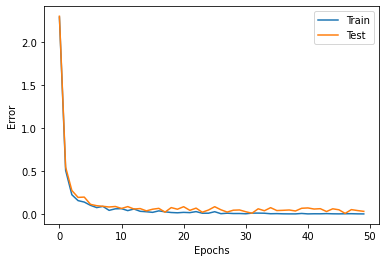

Accuracy Train:99.91652754590984% Accuracy Test:98.8313856427379%


In [50]:
#더 깊은 신경망(드롭아웃 추가)
#컨볼루션층의 오차 감소 효과 확인----------------------------------------------------------
#컨볼루션 층을 제외한 나머지 층의 가중치 및 편향 수정 제외

#손글씨 CNN 구현

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#손글씨 데이터 불러오기-----------
digits_data = datasets.load_digits()
input_data = digits_data.data
correct = digits_data.target
n_data = len(correct)

#입력 데이터 표준화----------------
ave_input = np.average(input_data)
std_input = np.std(input_data)
input_data = (input_data - ave_input) / std_input

#정답을 원핫 인코딩으로 표현--------------
#정답이 0~9의 10개중 하나 이므로 열은 10개
# 1 0 0 0 0 0 0 0 0 0
# ....
# 0 0 0 0 0 0 0 0 0 1
correct_data = np.zeros((n_data, 10))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0
    
#훈련 데이터와 테스트 데이터----------
index = np.arange(n_data)
index_train = index[index % 3 != 0]
#30%를 테스트 데이터로
index_test = index[index % 3 == 0]

#input_data는 8*8짜리 이미지가 1797개 포함되어 있다
#1797개의 행에 각각 64열씩 이미지 데이터가 포함되어 있는 것
#거기서 index만큼 행을 추출하여 훈련 및 테스트 데이터 추출
input_train = input_data[index_train, :] #훈련 데이터 추출
correct_train = correct_data[index_train, :] #훈련 데이터 정답
input_test = input_data[index_test, :] #테스트 데이터 입력
correct_test = correct_data[index_test, :] #테스트 데이터 정답

n_train = input_train.shape[0] #훈련 데이터 샘플 수
n_test = input_test.shape[0] #테스트 데이터 샘플 수

#각 설정 값-----------------
img_h = 8 #입력 이미지의 높이
img_w = 8 #입력 이미지 너비
img_ch = 1 #입력 이미지 채널 수

wb_width = 0.1 #가중 치와 편향 설정을 위한 정규분포 표준편차
eta = 0.01 #학습률
epoch = 50
batch_size = 8
interval = 10
n_sample = 200 #오차 계산 샘플 수

#이미지 데이터를 행렬로 변환-------------------------------
#입력이미지, 필터의 높이, 필터의 너비, 출력 이미지의 높이와 너비
def im2col(images, flt_h, flt_w, out_h, out_w, stride, pad):
    #배치 사이즈, 채널 수, 입력 이미지 높이, 너비
    n_bt, n_ch, img_h, img_w = images.shape
    
    img_pad = np.pad(images, [(0,0), (0,0), (pad, pad), (pad, pad)], "constant")
    #생성되는 행렬 크기
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            
            #h에서 부터 h_lim전 까지 stride만큼 건너뛰면서 슬라이싱
            cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]
            
    #채널 수 * 필터 높이 * 필터 너비 , 배치 사이즈 * 출력 이미지 높이 * 너비
    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(
        n_ch * flt_h * flt_w, n_bt * out_h * out_w
    )
            
    return cols

#행렬 데이터를 이미지로 변환-----------------------------------
def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):
    n_bt, n_ch, img_h, img_w = img_shape
    
    cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(
        3, 0, 1, 2, 4, 5
    )
    images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]
            
    return images[:, :, pad:img_h+pad, pad:img_w+pad]


#컨볼루션 층-----------------------------------------------------
class ConvLayer:
    #n_bt:배치사이즈, x_ch:입력채널 수
    #x_h : 입력 이미지 높이, x_w : 입력 이미지 너비
    #n_flt : 필더 수, flt_h : 필터 높이, flt_w : 필터 너비
    #stride : 스트라이드 너비, pad : 패딩 너비
    #y_ch: 출력 채널 수, y_h : 출력 높이, y_w : 출력 너비
    def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
        self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)
        
        #필터와 편향 초기값
        self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
        self.b = wb_width * np.random.randn(1, n_flt)
        
        #출력 이미지 크기
        self.y_ch = n_flt #출력 채널수
        self.y_h = (x_h - flt_h + 2 * pad) // stride + 1 #출력 높이
        self.y_w = (x_w - flt_w + 2 * pad) // stride + 1 #출력 너비
        
        #과적합 방지 - 아다그라드
        self.h_w = np.zeros((n_flt, x_ch, flt_h, flt_w)) + 1e-8
        self.h_b = np.zeros((1, n_flt)) + 1e-8
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #입력 이미지와 필터를 행렬로 변환
        self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
        self.w_col = self.w.reshape(n_flt, x_ch * flt_h * flt_w)
        
        #출력 계산:행렬 곱(컨볼루션), 편향 더하기, 활성화 함수
        u = np.dot(self.w_col, self.cols).T + self.b
        self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
        self.y = np.where(self.u <= 0, 0, self.u) #활성화 함수 - ReLU
        
    #뒷 층의 출력 기울기(입력에 대한 기울기)
    def backward(self, grad_y):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #delta
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU의 미분
        delta = delta.transpose(0, 2, 3, 1).reshape(n_bt * y_h * y_w, y_ch)
        
        #필터와 편향 기울기
        grad_w = np.dot(self.cols, delta)
        self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
        self.grad_b = np.sum(delta, axis =0)
        
        #입력 기울기
        grad_cols = np.dot(delta, self.w_col)
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)
        
    def update(self, eta):
        self.h_w += self.grad_w * self.grad_w
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b
        
#풀링층-----------------------------------------------------------------------------
class PoolingLayer:
    #n_bt:배치사이즈, x_ch:입력채널 수
    #x_h : 입력 이미지 높이, x_w : 입력 이미지 너비
    #pool : 풀링 영역 크기, pad : 패딩 너비
    #y_ch: 출력 채널 수, y_h : 출력 높이, y_w : 출력 너비
    def __init__(self, x_ch, x_h, x_w, pool, pad):
        self.params = (x_ch, x_h, x_w, pool, pad)
        
        self.y_ch = x_ch #출력 채널 수
        self.y_h = x_h // pool if x_h % pool == 0 else x_h // pool + 1 #출력 높이
        self.y_w = x_w // pool if x_w % pool == 0 else x_w // pool + 1 #출력 너비
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, pool, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #입력 이미지를 행렬로 변환
        cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
        cols = cols.T.reshape(n_bt * y_h * y_w * x_ch, pool * pool)
        
        #출력 계산 : 맥스풀링
        y = np.max(cols, axis=1) #위에서 cols.T로 전치 시켜서 axis를 0이 아닌 1을 사용하는 듯.
        self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)
        
        #최대값 인덱스 저장
        self.max_index = np.argmax(cols, axis=1)
        
    def backward(self, grad_y):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, pool, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
        
        #출력 기울기의 축을 변경
        grad_y = grad_y.transpose(0, 2, 3, 1)
        
        #행렬생성
        grad_cols = np.zeros((pool * pool, grad_y.size))
        
        #각 열의 최댓값이 있던 위치에 출력 기울기 입력
        grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
        grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
        grad_cols = grad_cols.transpose(5, 0, 1, 2, 3, 4)
        grad_cols = grad_cols.reshape(y_ch * pool * pool, n_bt * y_h * y_w)
        
        #입력 기울기
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)
        
#전결합층------------------------------------------------------------------------------
class BaseLayer:
    #앞 레이어 뉴런 개수, 현재 레이어 뉴런 개수
    def __init__(self, n_upper, n):
        #randn -> 평균 0, 표준편차 1인 가우시안 표준정규분포 난수를 행렬로 생성
        #wb_width 정규분포의 표준편차
        #가중치(행렬)
        self.w = wb_width * np.random.randn(n_upper, n)
        #편향(벡터)
        self.b = wb_width * np.random.randn(n)
        
        #아다그라드 적용--------------------------
        self.h_w = np.zeros((n_upper, n)) + 1e-8 #매우 작은 수를 더해 분모가 0이 되는 오류를 방지
        self.h_b = np.zeros(n) + 1e-8
        
    #eta - 학습률
    #확률적 경사 하강법을 통해 가중치와 편향 수정
    def update(self, eta):
        #아다그라드 적용--------------------------
        self.h_w += self.grad_w * self.grad_w
        #가중치 기울기
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        
        self.h_b += self.grad_b * self.grad_b
        #편향 기울기
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b

#은닉층----------------------
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) #활성화 함수 - ReLU
        
    #grad_y - 뒤 층의 입력 기울기 값
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU 미분
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
#출력층-----------------------
class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1).reshape(-1, 1) #활성화 함수 - 소프트맥스

    #t - 예측의 정답
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        #입력값 기울기
        self.grad_x = np.dot(delta, self.w.T)
        
#드롭아웃 층------------------
class Dropout:
    def __init__(self, dropout_ratio):
        self.dropout_ratio = dropout_ratio
        
    def forward(self, x, is_train):
        if is_train:
            rand = np.random.rand(*x.shape) #난수 행렬
            self.dropout = np.where(rand > self.dropout_ratio, 1, 0) #확률에 따라 1 또는 0
            self.y = x * self.dropout #뉴런을 무작위로 무효화
        else:
            self.y = (1 - self.dropout_ratio) * x #출력값을 낮춘다.
            
    def backward(self, grad_y):
        self.grad_x = grad_y * self.dropout #제거된 뉴런에는 역전파 하지 않도록
        
#각 층의 초기화-------------------------------------------------------------------------------
#필터 개수 10, 필터 높이 3, 필터 너비 3, 스트라이드 1, 패딩 너비 1
#이미지가 컨볼루션 층에서 축소되는 것을 막기 위해 패딩 설정
cl_1 = ConvLayer(img_ch, img_h, img_w, 10, 3, 3, 1, 1)
cl_2 = ConvLayer(cl_1.y_ch, cl_1.y_h, cl_1.y_w, 10, 3, 3, 1, 1)
#입력 채널 수, 입력 이미지 높이, 입력 이미지 너비, 풀링 영역 크기, 패딩 너비
pl_1 = PoolingLayer(cl_2.y_ch, cl_2.y_h, cl_2.y_w, 2, 0)

#전결합층의 입력값은 4차원 -> 2차원 배열로 변환
n_fc_in = pl_1.y_ch * pl_1.y_h * pl_1.y_w
#앞 층 뉴런 개수, 자신의 뉴런 개수
ml_1 = MiddleLayer(n_fc_in, 200)
dr_1 = Dropout(0.5)

ml_2 = MiddleLayer(200, 200)
dr_2 = Dropout(0.5)

#앞 층 뉴런 개수, 자신의 뉴런 개수
ol_1 = OutputLayer(200, 10)

#순전파---------------------------------------------------------------------------------------
def forward_propagation(x, is_train):
    n_bt = x.shape[0]
    
    images = x.reshape(n_bt, img_ch, img_h, img_w)
    cl_1.forward(images)
    cl_2.forward(cl_1.y)
    pl_1.forward(cl_2.y)
    
    #4차원 -> 2차원으로 변환
    fc_input = pl_1.y.reshape(n_bt, -1)
    ml_1.forward(fc_input)
    dr_1.forward(ml_1.y, is_train)
    
    ml_2.forward(dr_1.y)
    dr_2.forward(ml_2.y, is_train)
    
    ol_1.forward(dr_2.y)
    
#역전파---------------------------------------------------------------------------------------
#t : 정답
def back_propagation(t):
    n_bt = t.shape[0]
    
    ol_1.backward(t)
    dr_2.backward(ol_1.grad_x)
    ml_2.backward(dr_2.grad_x)
    dr_1.backward(ml_2.grad_x)
    ml_1.backward(dr_1.grad_x)
    
    #2차원 -> 4차원
    grad_img = ml_1.grad_x.reshape(n_bt, pl_1.y_ch, pl_1.y_h, pl_1.y_w)
    pl_1.backward(grad_img)
    cl_2.backward(pl_1.grad_x)
    cl_1.backward(cl_2.grad_x)
    
#가중치와 편향 수정--------------------------------------------------------------------------
def update_wb():
    cl_1.update(eta)
    cl_2.update(eta)
    ml_1.update(eta)
    ml_2.update(eta)
    ol_1.update(eta)
    
#교차 엔트로피 오차 계산--------------------------------------------------------------------
#미니 배치 학습이므로 오차의 총합을 배치 사이즈로 나눈다.
def get_error(t, batch_size):
    return -np.sum(t * np.log(ol_1.y + 1e-7)) / batch_size

#샘플을 순전파------------------------------------------------------------------------------
def forward_sample(inp, correct, n_sample):
    index_rand = np.arange(len(correct))
    np.random.shuffle(index_rand)
    #샘플 개수만큼 랜덤 인덱스 추출
    index_rand = index_rand[:n_sample]
    x = inp[index_rand, :]
    t = correct[index_rand, :]
    forward_propagation(x, is_train=False)
    return x, t

#오차 기록용-------------
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

#학습 경과 기록 ------------
n_batch = n_train // batch_size #1에포크당 배치 수
for i in range(epoch):
    #오차 계측-------
    x, t = forward_sample(input_train, correct_train, n_sample)
    error_train = get_error(t, n_sample)
    
    x, t = forward_sample(input_test, correct_test, n_sample)
    error_test = get_error(t, n_sample)
    
    #오차 기록-------
    train_error_x.append(i)
    train_error_y.append(error_train)
    test_error_x.append(i)
    test_error_y.append(error_test)
    
    #경과 표시-------
    if i % interval == 0:
        print(f"Epoch: {i}/{epoch} Error_train:{error_train}, Error_test:{error_test}")
        
    #학습--------    
    index_random = np.arange(n_train) #학습에 사용할 인덱스를 생성
    np.random.shuffle(index_random) #인덱스를 무작위로 섞음
    
    for j in range(n_batch):
        #미니배치 샘플 추출
        mb_index = index_random[j * batch_size : (j+1) * batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        #순전파와 역전파
        forward_propagation(x, is_train=True)
        back_propagation(t)
        
        #가중치와 편향 수정
        update_wb()
        
#기록된 오차를 그래프로 표시---------
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

#정답률 측정----------------
x, t = forward_sample(input_train, correct_train, n_train)
count_train = np.sum(
    np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1)
)

x, t = forward_sample(input_test, correct_test, n_test)
count_test = np.sum(
    np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1)
)

print(f"Accuracy Train:{count_train/n_train*100}% Accuracy Test:{count_test/n_test*100}%")

In [24]:
#MNIST 손글씨 인식 (Keras-Tensorflow)
#https://nextjournal.com/gkoehler/digit-recognition-with-keras

# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
#from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

from sklearn import datasets

#손글씨 데이터 불러오기-----------
digits_data = datasets.load_digits()
input_data = digits_data.data
correct = digits_data.target
n_data = len(correct)

fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(input_data[i].reshape(8,8), cmap='gray', interpolation='none')
    plt.title(f"Digit: {correct[i]}")
    plt.xticks([])
    plt.yticks([])
fig
plt.savefig("result")


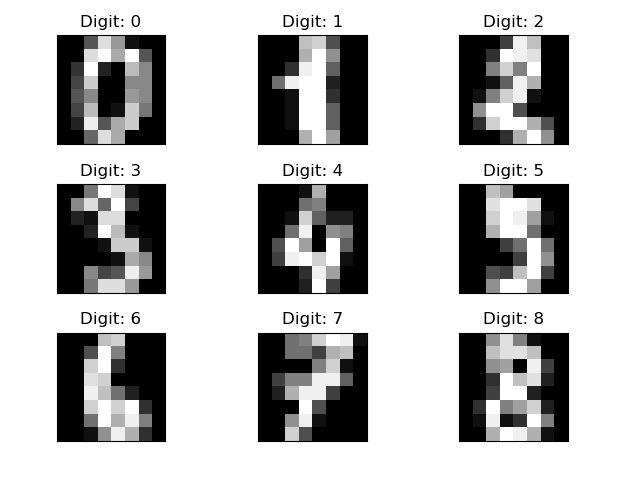

In [25]:
# let's print the shape before we reshape and normalize
print("input shape", input_data.shape)
print("correct shape", correct.shape)

# building the input vector from the 8x8 pixels
# input_data = input_data.reshape(1797, 64)
# input_data = input_data.astype('float32')
# correct = correct.astype('float32')

# normalizing the data to help with the training
# X_train /= 255
# X_test /= 255
#입력 데이터 표준화----------------
ave_input = np.average(input_data)
std_input = np.std(input_data)
input_data = (input_data - ave_input) / std_input

input shape (1797, 64)
correct shape (1797,)


In [26]:
print(np.unique(correct, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


In [27]:
# one-hot encoding using keras' numpy-related utilities
#원핫 인코딩
n_classes = 10
print("Shape before one-hot encoding: ", correct.shape)
correct_data = np_utils.to_categorical(correct, n_classes)
print("Shape after one-hot encoding: ", correct_data.shape)

Shape before one-hot encoding:  (1797,)
Shape after one-hot encoding:  (1797, 10)


In [20]:
# building a linear stack of layers with the sequential model
model = Sequential()
#Dense는 뉴런 개수
model.add(Dense(200, input_shape=(64,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [21]:
# compiling the sequential model
#교차 엔트로피 오차 계산
#최적화 알고리즘 - adam(기존에는 확률적 경사하강법 or 아다그라드를 썼다.)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
#훈련 데이터와 테스트 데이터----------
n_data = correct.shape[0]
index = np.arange(n_data)
index_train = index[index % 3 != 0]
#30%를 테스트 데이터로
index_test = index[index % 3 == 0]

#input_data는 8*8짜리 이미지가 1797개 포함되어 있다
#1797개의 행에 각각 64열씩 이미지 데이터가 포함되어 있는 것
#거기서 index만큼 행을 추출하여 훈련 및 테스트 데이터 추출
input_train = input_data[index_train, :] #훈련 데이터 추출
correct_train = correct_data[index_train, :] #훈련 데이터 정답
input_test = input_data[index_test, :] #테스트 데이터 입력
correct_test = correct_data[index_test, :] #테스트 데이터 정답

n_train = input_train.shape[0] #훈련 데이터 샘플 수
n_test = input_test.shape[0] #테스트 데이터 샘플 수

In [35]:
import os

# training the model and saving metrics in history
history = model.fit(input_train, correct_train,
          batch_size=8, epochs=50,
          verbose=2,
          validation_data=(input_test, correct_test))

# saving the model
current_dir = os.path.abspath('')
save_dir = os.path.join(current_dir, "results")
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig
plt.savefig("keras_result")

Epoch 1/50
150/150 - 0s - loss: 0.0298 - accuracy: 0.9950 - val_loss: 0.0733 - val_accuracy: 0.9900
Epoch 2/50
150/150 - 0s - loss: 0.0113 - accuracy: 0.9958 - val_loss: 0.0915 - val_accuracy: 0.9866
Epoch 3/50
150/150 - 0s - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.0861 - val_accuracy: 0.9883
Epoch 4/50
150/150 - 0s - loss: 0.0117 - accuracy: 0.9975 - val_loss: 0.0823 - val_accuracy: 0.9866
Epoch 5/50
150/150 - 0s - loss: 0.0135 - accuracy: 0.9950 - val_loss: 0.0742 - val_accuracy: 0.9883
Epoch 6/50
150/150 - 0s - loss: 0.0231 - accuracy: 0.9942 - val_loss: 0.1508 - val_accuracy: 0.9800
Epoch 7/50
150/150 - 0s - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.0787 - val_accuracy: 0.9816
Epoch 8/50
150/150 - 0s - loss: 0.0465 - accuracy: 0.9908 - val_loss: 0.0794 - val_accuracy: 0.9866
Epoch 9/50
150/150 - 0s - loss: 0.0224 - accuracy: 0.9958 - val_loss: 0.0620 - val_accuracy: 0.9933
Epoch 10/50
150/150 - 0s - loss: 0.0164 - accuracy: 0.9967 - val_loss: 0.0821 - val_accuracy: 0.9850

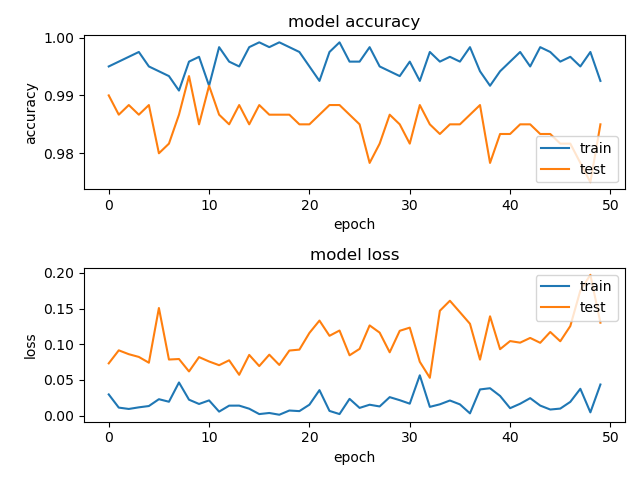

In [37]:
current_dir = os.path.abspath('')
save_dir = os.path.join(current_dir, "results")
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)


mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(input_test, correct_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

19/19 - 0s - loss: 0.1303 - accuracy: 0.9850
Test Loss 0.13028548657894135
Test Accuracy 0.9849749803543091


In [51]:
# load the model and create predictions on the test set
current_dir = os.path.abspath('')
save_dir = os.path.join(current_dir, "results")
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)

mnist_model = load_model(model_path)
predicted_classes = np.argmax(mnist_model.predict(input_test), axis=-1)

print(predicted_classes)

#정답 비교를 위해 원핫 인코딩된 정답을 숫자로 데이터로 변환
correct_test_values = np.argmax(correct_test, axis = 1)
print(correct_test_values)

#정답이 일치한 인덱스 목록
match_result = np.isin(predicted_classes, correct_test_values)
print(match_result)
#where는 찾는 요소의 위치를 x,y 식으로 리턴하므로 첫번째 거를 가져와야 한다.
correct_indices = np.where(match_result == True)[0]
print(len(correct_indices)," classified correctly")
print(correct_indices)
incorrect_indices = np.where(match_result == False)[0]
print(len(incorrect_indices)," classified incorrectly")
print(incorrect_indices)

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct_index in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(input_test[correct_index].reshape(8,8), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct_index],
                                        correct_test_values[correct_index]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(input_test[incorrect].reshape(8,8), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       correct_test_values[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

plt.savefig("keras_check_result")

[0 3 6 9 2 5 8 1 4 7 0 5 0 9 1 3 0 2 2 2 3 3 6 7 0 2 0 7 2 4 1 1 8 1 5 9 7
 4 8 5 5 2 0 1 2 5 8 1 4 7 0 3 6 9 5 5 8 4 7 1 2 8 1 3 3 6 4 5 5 2 1 3 7 3
 7 4 4 3 6 5 7 2 5 8 0 8 2 5 8 1 4 7 0 3 6 9 5 5 8 4 7 1 2 8 1 3 3 6 4 5 5
 2 1 3 7 3 9 6 3 0 6 1 4 2 2 9 8 9 9 1 4 7 0 3 6 9 2 5 8 9 6 9 8 7 5 0 7 0
 6 7 4 6 1 9 8 0 6 1 6 3 9 4 4 3 6 5 7 2 7 4 4 8 0 3 6 9 2 5 8 1 4 7 0 5 0
 9 1 3 0 2 2 2 3 3 6 9 0 2 0 7 2 4 1 1 8 1 5 9 7 4 8 5 5 8 0 8 2 5 8 1 4 7
 0 3 6 9 4 5 8 4 7 1 2 8 1 3 3 6 4 5 5 2 1 3 7 3 9 6 3 0 6 1 4 2 2 9 8 9 9
 1 4 7 0 3 4 9 2 5 8 9 6 9 8 7 5 0 7 0 6 7 4 4 1 9 8 0 6 1 6 3 7 4 4 3 6 5
 7 2 7 4 4 8 1 4 7 0 3 6 9 2 5 8 9 6 9 8 7 5 7 0 6 7 4 6 1 9 8 0 6 1 3 9 6
 3 0 6 1 4 2 2 9 4 8 0 3 6 9 2 5 8 1 4 7 0 5 0 9 1 3 0 8 1 3 3 6 4 5 5 2 1
 3 7 3 9 6 3 0 6 1 4 2 2 9 1 9 9 1 4 7 0 3 6 9 2 5 8 9 6 9 8 7 5 0 7 0 6 7
 4 6 1 9 8 0 6 1 6 3 7 4 4 3 6 5 7 2 7 4 4 8 0 3 6 9 2 5 8 1 4 7 0 5 0 9 1
 3 0 2 2 2 3 3 6 9 0 2 0 7 2 4 1 1 8 1 5 9 7 4 8 5 5 8 0 1 4 7 0 3 6 9 2 5
 8 9 6 9 8 7 5 0 7 0 6 7 

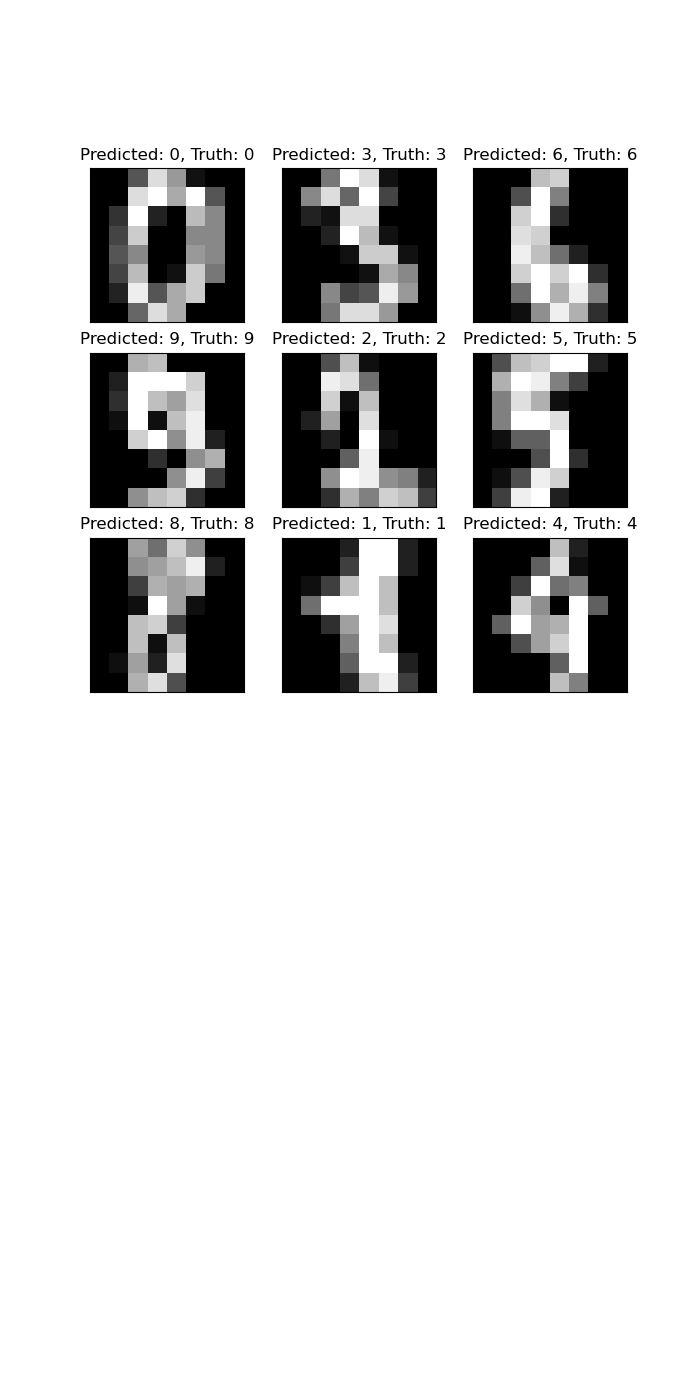